In [114]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
from scipy.io import wavfile as wav
import librosa
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [115]:
dataset_dir = r"C:\Users\aashutosh kumar\Videos\Audio"
file_paths = []
labels_list = []

for labels in (os.listdir(dataset_dir)[:7]):
    l = labels.split("_")[1]
    path = os.path.join(dataset_dir, labels)
    for i in os.listdir(path):
        labels_list.append(l)
        final_path = os.path.join(path, i)
        file_paths.append(final_path)
        


In [116]:
dataset = pd.DataFrame()
dataset["paths"] = file_paths
dataset["emotion"] = labels_list

dataset.head()

,paths,emotion
0,C:\Users\aashutosh kumar\Videos\Audio\OAF_angr...,angry
1,C:\Users\aashutosh kumar\Videos\Audio\OAF_angr...,angry
2,C:\Users\aashutosh kumar\Videos\Audio\OAF_angr...,angry
3,C:\Users\aashutosh kumar\Videos\Audio\OAF_angr...,angry
4,C:\Users\aashutosh kumar\Videos\Audio\OAF_angr...,angry


<Axes: xlabel='emotion', ylabel='count'>

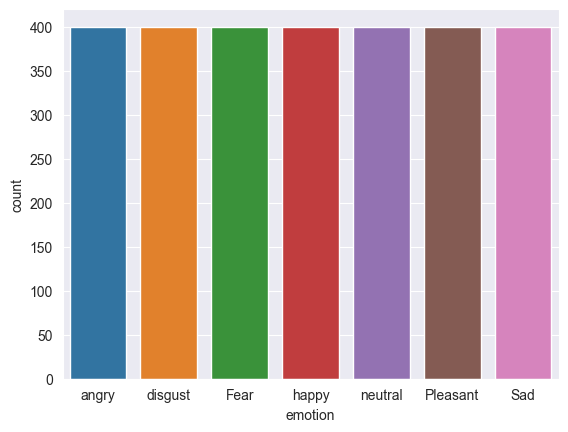

In [117]:
sns.countplot(data = dataset, x = "emotion", hue = "emotion")

In [118]:
unique_emotions = dataset['emotion'].unique()

emotion_paths = {}

for emotion in unique_emotions:
    filtered_paths = dataset['paths'][dataset['emotion'] == emotion].values
    if len(filtered_paths) > 0:
        emotion_paths[emotion] = filtered_paths[0]


emotion_paths

{'angry': 'C:\\Users\\aashutosh kumar\\Videos\\Audio\\OAF_angry\\OAF_back_angry.wav',
 'disgust': 'C:\\Users\\aashutosh kumar\\Videos\\Audio\\OAF_disgust\\OAF_back_disgust.wav',
 'Fear': 'C:\\Users\\aashutosh kumar\\Videos\\Audio\\OAF_Fear\\OAF_back_fear.wav',
 'happy': 'C:\\Users\\aashutosh kumar\\Videos\\Audio\\OAF_happy\\OAF_back_happy.wav',
 'neutral': 'C:\\Users\\aashutosh kumar\\Videos\\Audio\\OAF_neutral\\OAF_back_neutral.wav',
 'Pleasant': 'C:\\Users\\aashutosh kumar\\Videos\\Audio\\OAF_Pleasant_surprise\\OAF_back_ps.wav',
 'Sad': 'C:\\Users\\aashutosh kumar\\Videos\\Audio\\OAF_Sad\\OAF_back_sad.wav'}

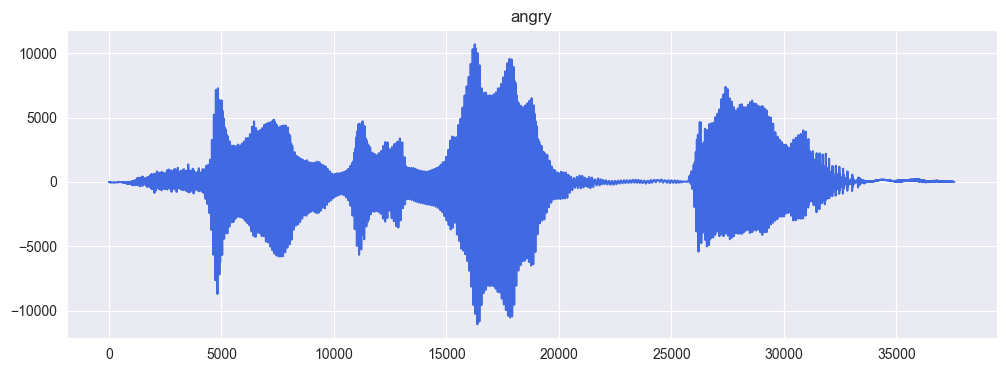

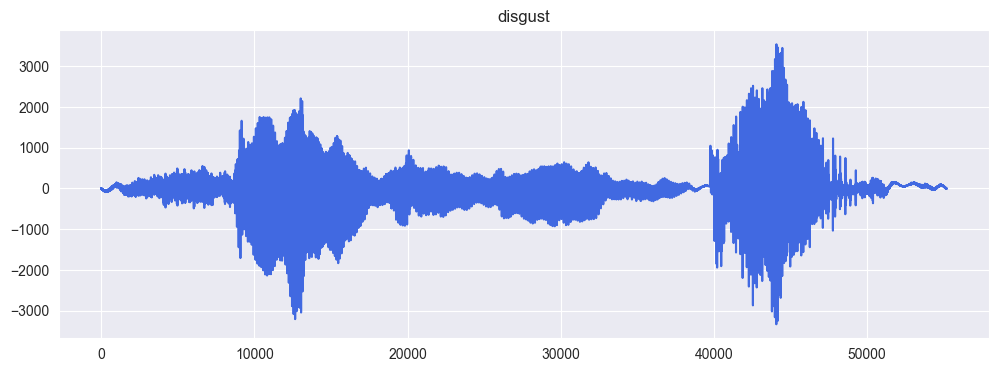

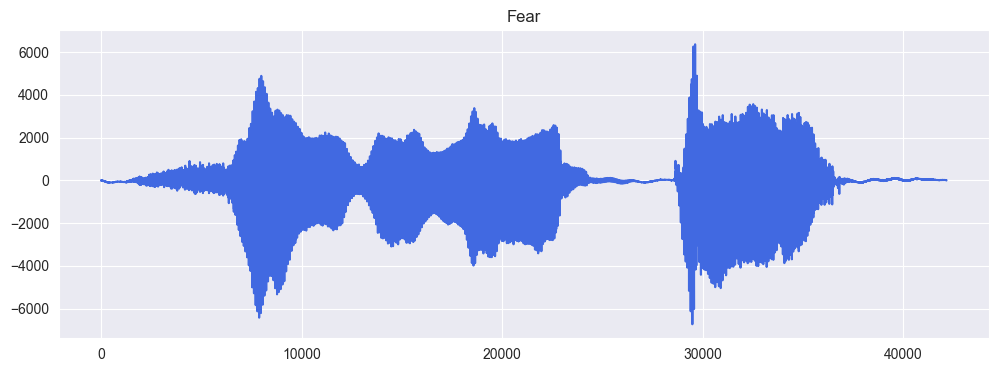

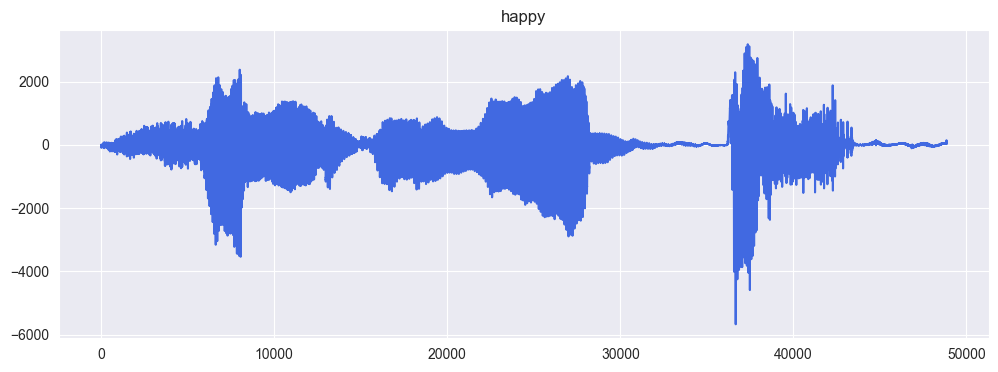

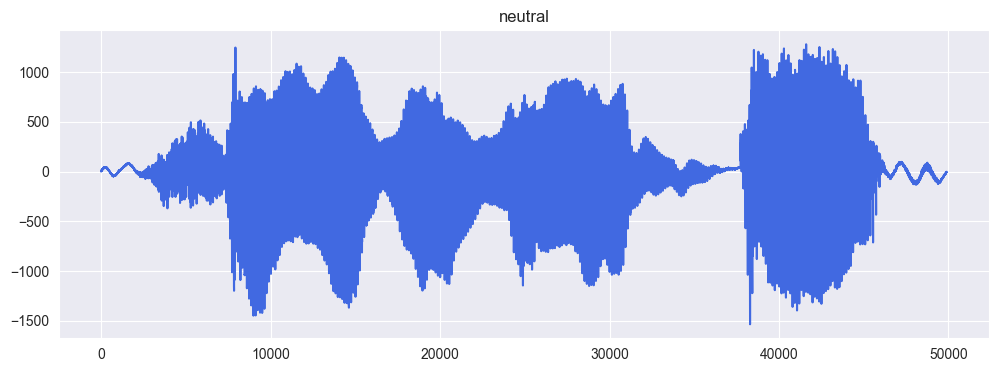

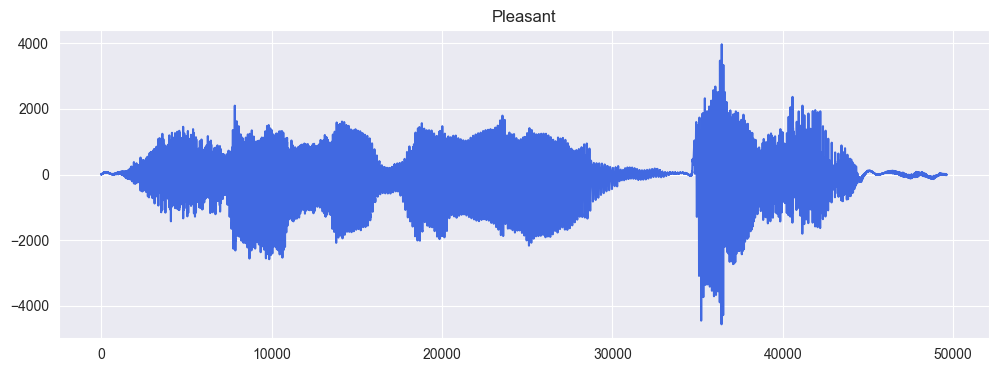

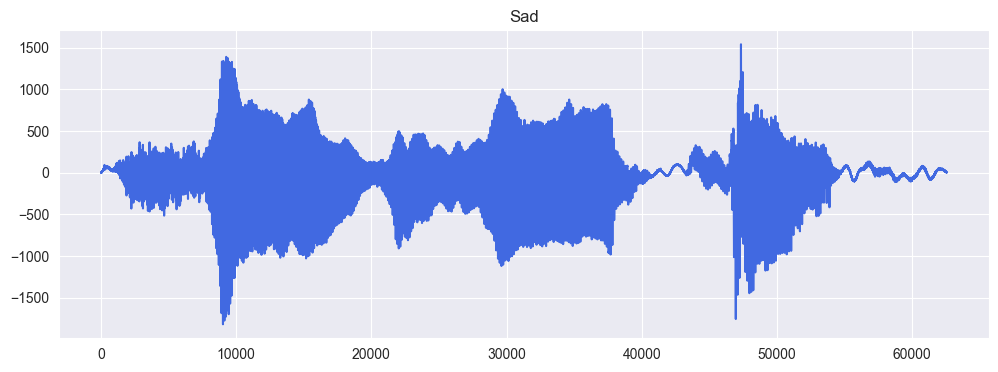

In [119]:
for emotion, path in emotion_paths.items():
    wave_sample_rate, wave_audio = wav.read(path)
    plt.figure(figsize=(12,4))
    plt.title(emotion)
    plt.plot(wave_audio, color = "royalblue")
     

In [120]:
def feature_extractor(file):
    audio, sample_rate = librosa.load(file)
    mlfcc_features = librosa.feature.mfcc(y = audio,sr = sample_rate, n_mfcc = 40)
    scaled_mlfcc_features = np.mean(mlfcc_features.T,axis = 0)
    return scaled_mlfcc_features

In [121]:
dataset["features"] = dataset["paths"].apply(feature_extractor)

In [122]:
dataset.head(4)

,paths,emotion,features
0,C:\Users\aashutosh kumar\Videos\Audio\OAF_angr...,angry,"[-383.43262, 52.460808, -17.608944, -11.81031,..."
1,C:\Users\aashutosh kumar\Videos\Audio\OAF_angr...,angry,"[-444.5501, 65.29204, -2.571654, -20.355955, -..."
2,C:\Users\aashutosh kumar\Videos\Audio\OAF_angr...,angry,"[-402.1927, 26.256584, -5.02363, -0.40751934, ..."
3,C:\Users\aashutosh kumar\Videos\Audio\OAF_angr...,angry,"[-383.49704, 52.38679, -11.534899, -13.97594, ..."


In [123]:
dataset["emotion"].unique()

array(['angry', 'disgust', 'Fear', 'happy', 'neutral', 'Pleasant', 'Sad'],
      dtype=object)

In [124]:
encoder = LabelEncoder()
dataset["emotion"] = encoder.fit_transform(dataset["emotion"])
dataset.head(4)

,paths,emotion,features
0,C:\Users\aashutosh kumar\Videos\Audio\OAF_angr...,3,"[-383.43262, 52.460808, -17.608944, -11.81031,..."
1,C:\Users\aashutosh kumar\Videos\Audio\OAF_angr...,3,"[-444.5501, 65.29204, -2.571654, -20.355955, -..."
2,C:\Users\aashutosh kumar\Videos\Audio\OAF_angr...,3,"[-402.1927, 26.256584, -5.02363, -0.40751934, ..."
3,C:\Users\aashutosh kumar\Videos\Audio\OAF_angr...,3,"[-383.49704, 52.38679, -11.534899, -13.97594, ..."


In [125]:
encoded_classes = list(encoder.classes_)
encoded_mapping = {i: emotion for i, emotion in enumerate(encoded_classes)}

# Print the mapping
print("Encoding Mapping:")
for i, emotion in encoded_mapping.items():
    print(f"{i}: {emotion}")

Encoding Mapping:
0: Fear
1: Pleasant
2: Sad
3: angry
4: disgust
5: happy
6: neutral


In [132]:
X = np.array(dataset["features"].to_list())
Y = np.array(dataset["emotion"].to_list())


In [138]:
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [139]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2240, 40), (560, 40), (2240,), (560,))